# PassageExtremes

In [1]:
import sys; sys.path.append('../..')
from abslithist import *
from abslithist.realism import *

In [2]:
dfpsg = pd.read_pickle(PATH_PSG_SCORE).reset_index()
dfpsg

,id,year,field_period,i_psg,txt,i_tok,i_para,i_sent,i_word,num_word,num_word_types,ttr,num_recog,num_recog_types,ttr_recog,val_mean,val_median,val_stdev,val_mean_z
0,chadwyck.Holcroft.The_Adventures_of_Hugh_Tr.1128,1794,C18,578,"Yet this\n\nis precisely what is done, by maki...",244503,0,4428,108434,167,86,0.514970,62,46,0.741935,-1.384575,-1.504237,0.584009,-3.065383
1,chadwyck.Fielding.Tom_Jones.1029,1749,C18,156,"But, says he, if by\n\nHonour you mean the tru...",74496,0,817,32667,196,94,0.479592,54,35,0.648148,-1.384041,-1.433622,0.427882,-3.064111
2,chadwyck.Amory.John_Buncle.0993,1756,C18,1110,The proof of obligation is equally\n\nstrong i...,500961,1,7370,218547,129,62,0.480620,54,33,0.611111,-1.366873,-1.463607,0.437405,-3.023241
3,chadwyck.Amory.John_Buncle.0993,1756,C18,877,"But as this was what\n\nmankind really did, an...",395243,1,5630,172504,150,99,0.660000,50,45,0.900000,-1.351782,-1.474633,0.550533,-2.987313
4,Johnson.Rambler.Vol1,1750,C18,122,The interest which the corrupt part of mankind...,49474,6,688,22878,193,118,0.611399,53,50,0.943396,-1.349135,-1.494209,0.596056,-2.981012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962149,Rabelais.Gargantua and Pantagruel,1534,C17,1204,Thistle-finches. sant poots. Parmesan cheese. ...,540490,5,9580,249797,74,64,0.864865,51,48,0.941176,1.591506,1.801656,0.748263,4.019686
962150,Rabelais.Gargantua and Pantagruel,1534,C17,1115,Gulch-lard. Snap-lard. Rusty-lard. Eye-lard. C...,504244,5,8709,232904,69,61,0.884058,51,43,0.843137,1.660586,1.946955,0.854439,4.184143
962151,Rabelais.Gargantua and Pantagruel,1534,C17,1202,"Then they offered:\n\nChitterlings, gar- ...",540079,5,9513,249628,88,72,0.818182,50,46,0.920000,1.703995,1.990096,0.876728,4.287485
962152,Rabelais.Gargantua and Pantagruel,1534,C17,1207,Sheath-fish. Smelts. Roaches. Mackerels. Rock-...,541344,5,9653,250130,101,92,0.910891,50,43,0.860000,1.709474,1.988936,0.891878,4.300528


In [3]:
dfpsg.num_recog.describe()

count    962154.000000
mean         56.115445
std          10.443038
min          50.000000
25%          51.000000
50%          54.000000
75%          58.000000
max        2900.000000
Name: num_recog, dtype: float64

In [4]:
def compare_extremes(dfall,corpus_name='CanonFiction',topn=3,width=500,vnum='v8-psgscore',valcol='val_mean'):
    C=lltk.load(corpus_name)
    most_conc = dfall.sort_values(valcol,ascending=False).head(topn)
    most_abs = dfall.sort_values(valcol,ascending=True).head(topn)
    
    for i_conc,(index_conc,row_conc) in enumerate(tqdm(list(most_conc.iterrows()))):
        idx_conc=row_conc.id
        t_conc=C.textd[idx_conc]

        i_abs=i_conc
        row_abs=most_abs.iloc[i_abs]
        idx_abs=row_abs.id
        t_abs=C.textd[idx_abs]
        
        fn=compare_psgs(
            (row_abs.txt, row_conc.txt),
            (t_abs, t_conc),
            (f'#{i_abs+1} most abstract passage',f'#{i_conc+1} most concrete passage'),
#             ('',''),
            show=False,
            ofn=os.path.join(PATH_FIGS,'extremes',vnum,f'extreme-{i_conc}.png'),
        )
        from IPython.display import Image
        display(Image(filename=fn))
#         print(fn)
#         break

  0%|          | 0/4 [00:00<?, ?it/s]

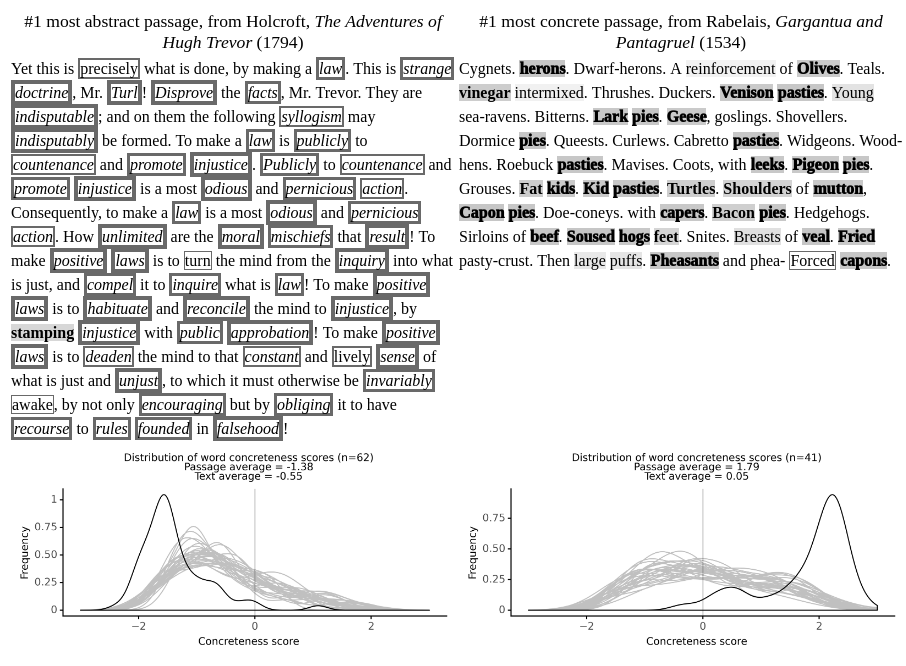

 25%|██▌       | 1/4 [00:10<00:32, 10.97s/it]

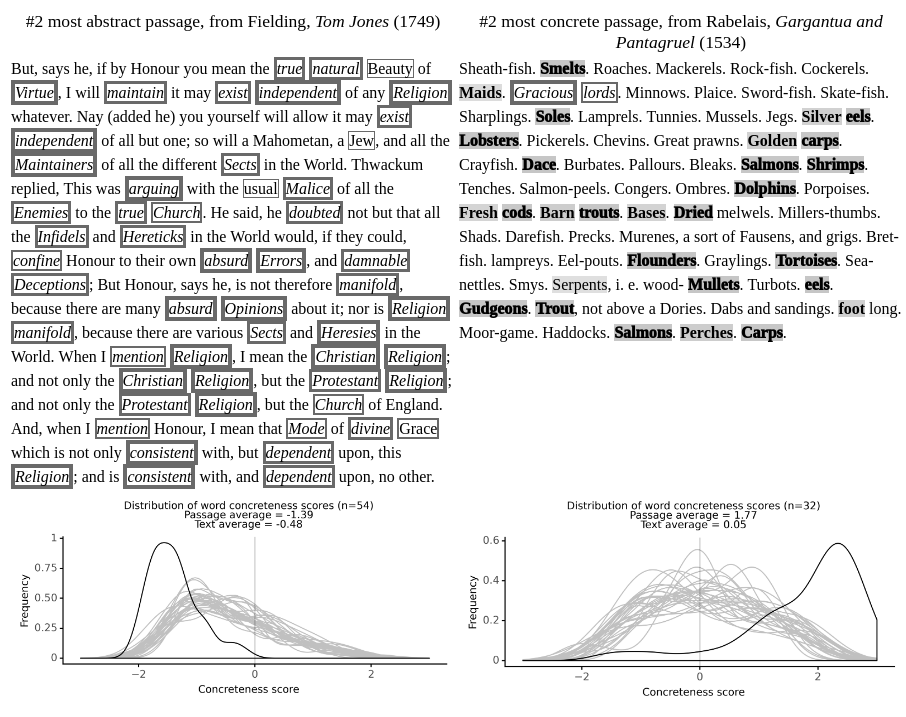

 50%|█████     | 2/4 [00:20<00:21, 10.55s/it]

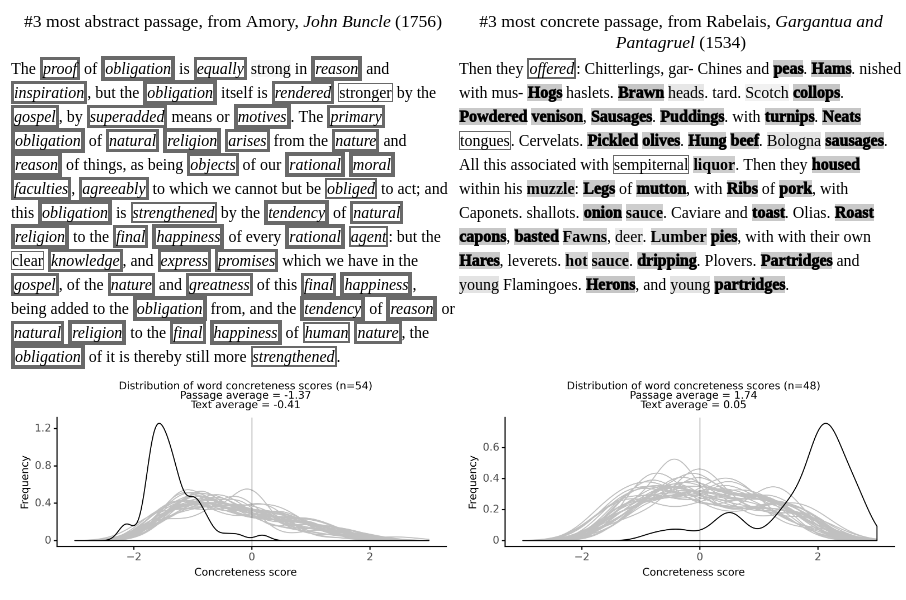

 75%|███████▌  | 3/4 [00:29<00:10, 10.17s/it]

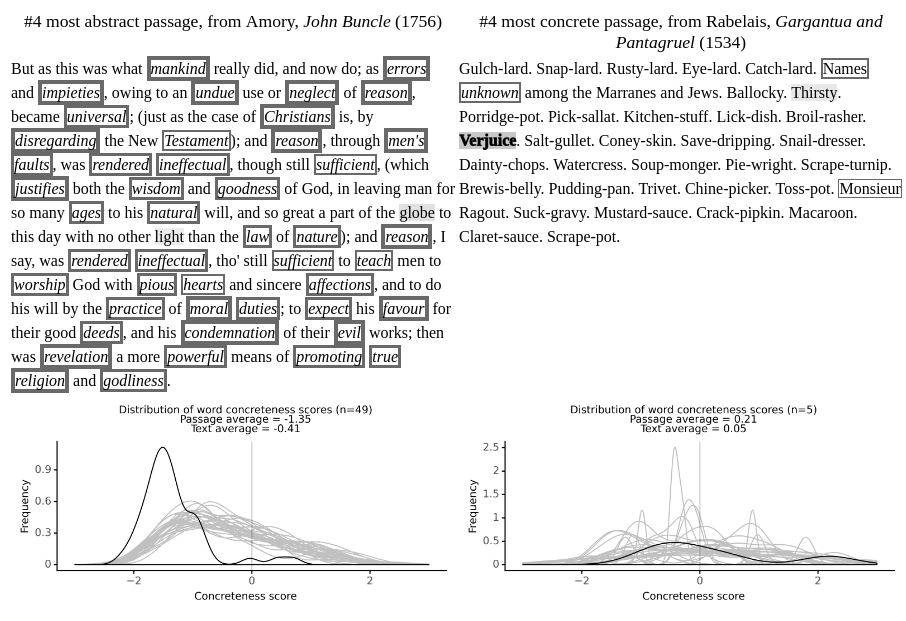

100%|██████████| 4/4 [00:39<00:00,  9.78s/it]


In [5]:
compare_extremes(dfpsg,topn=4)

In [6]:
dfpsg.iloc[-4]

id                                 Rabelais.Gargantua and Pantagruel
year                                                            1534
field_period                                                     C17
i_psg                                                           1115
txt                Gulch-lard. Snap-lard. Rusty-lard. Eye-lard. C...
i_tok                                                         504244
i_para                                                             5
i_sent                                                          8709
i_word                                                        232904
num_word                                                          69
num_word_types                                                    61
ttr                                                         0.884058
num_recog                                                         51
num_recog_types                                                   43
ttr_recog                         